In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Arboles de decisión
## Arboles de regresión

Para practicar el modelo de arbol de regresión, vamos a usar el dataset **Hitters**, el cual contiene datos de jugadores de beisbol de la liga estadounidense de 1986 y 1987. Contiene 322 observaciones con 20 datos. Este conjunto de datos se tomó de la biblioteca StatLib que se mantiene en la Universidad Carnegie Mellon. Los datos salariales fueron originalmente de Sports Illustrated, 20 de abril de 1987. Las estadísticas de 1986 y de carrera se obtuvieron de The 1987 Baseball Encyclopedia Update publicado por Collier Books, Macmillan Publishing Company, Nueva York.

Lo que queremos hacer es tener alguna regresión de los salarios de 1987 los jugadores usando como base los datos de ellos de su perfomance en 1986.

In [2]:
# Cargamos el dataset
df_hitters = pd.read_csv("./Hitters.csv")

In [3]:
df_hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [4]:
df_hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [5]:
# Como los datos de salario no están completos, descartamos a aquellos jugadores que no tienen ese dato.
df_hitters.dropna(subset="Salary", inplace=True)

In [6]:
# Aplico feature engineering, modificando el target por el logaritmo
df_hitters["Salary_log"] = np.log(df_hitters["Salary"])

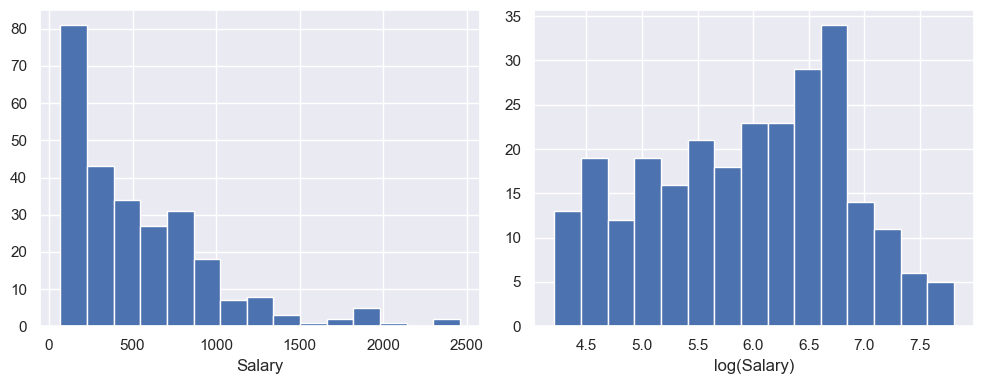

In [7]:
f, ax = plt.subplots(1,2, figsize=(10, 4))
df_hitters["Salary"].hist(ax=ax[0], bins=15)
df_hitters["Salary_log"].hist(ax=ax[1], bins=15)

ax[0].set_xlabel("Salary")
ax[1].set_xlabel("log(Salary)")
plt.tight_layout()

Como podemos ver, mejoramos la dispersion de datos, principalmente aquellos que estan en los primeros bins.

----

Trabajemos en el modelo

Empezamos separando los datos, para este ejemplo, solo voy a usar *Hits, Putouts, RBI, Runs, Walks y Years*. Que significa cada cosa está [explicado aqui](https://rdrr.io/cran/ISLR/man/Hitters.html)

In [8]:
# Para este ejemplo, solo voy a usar Years, RBI, PutOuts, Hits, Walks, Run como atributos. 
X = df_hitters.loc[:, ["Hits", "PutOuts", "RBI", "Runs", "Walks", "Years"]].values
# Y como variable a predecir a Salary_log
y = df_hitters.loc[:, "Salary_log"].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

Ahora vamos a aplicar el procedimiento que vimos, primero llamamos al modelo de [arbol de regresion](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
# Creamos el arbol
regression = DecisionTreeRegressor(criterion='squared_error', splitter='best', 
                                   max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                   random_state=42)
# Y entrenamos
regression.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Podemos  ver cuales son los parametros de creacion de mi modelo (esto sale en la documentacion misma y es comun a todos los modelos) usando ".get_params()".

In [12]:
regression.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Podemos ver a nuestro arbol para entender que hizo usando [export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(regression, out_file = "arbol_regresion.dot",
                feature_names=["Hits", "PutOuts", "RBI", "Runs", "Walks", "Years"],
                rounded=True,
                filled=True)

Podemos ver nuestro arbol en [webgraphviz](http://www.webgraphviz.com/?tab=map). Esta pagina nos mostrara la disposicion de nuestros nodos y como el algoritmo fue tomando desicion de las diferentes divisiones.

Es por esto que prefiero usar la herramienta web, se puede trabajar, para mejorar la gráfica:

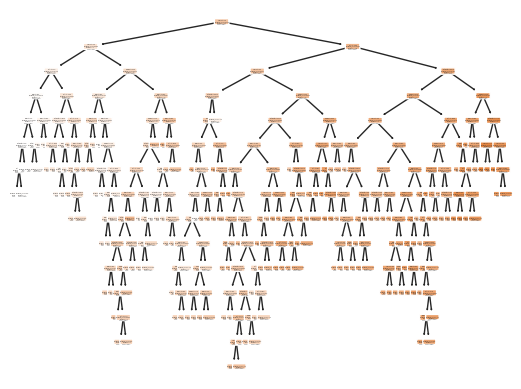

In [14]:
from sklearn.tree import plot_tree
plot_tree(regression, filled=True, feature_names=["Hits", "PutOuts", "RBI", "Runs", "Walks", "Years"], rounded=True);

Midamos como este modelo performa usando el error medio absoluto:

In [15]:
from sklearn.metrics import mean_absolute_error

y_pred_train = regression.predict(X_train)
y_pred = regression.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred)

print(f"El error de entreamiento fue: {mae_train}")
print(f"El error de testeo fue: {mae}")

El error de entreamiento fue: 0.0
El error de testeo fue: 0.4601579497699184


Este resultado es muy malo, si el entrenamiento es cero, es seguro que hay overfitting (esto lo esperabamos, por elegimos que las hojas tengan una sola muestra). Pero comparemos con algun modelo, rapidamente para tener alguna referencia

In [16]:
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

y_pred_lineal = regresion_lineal.predict(X_test)

print(f"El error de testeo fue: {mean_absolute_error(y_test, y_pred_lineal)}")

El error de testeo fue: 0.5276951139451312


Asi y todo, performo mejor que el modelo de regresión lineal, pero no por mucho.

----

Ahora intentemos podar el arbol, para ello vamos a usar el argumento [ccp_alpha](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) que es el alfa que vimos en clase para podar arboles y cross-validation para encontrar el mejor valor de alpha que logre podar el arbol pero minizar lo mas posible el error usando validación cruzada con 5 folds.

Ademas vamos a llamar a [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que nos va a permitir calcular la metrica de evaluacion usando [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Hagamos una ejecucion de prueba

clf = DecisionTreeRegressor(criterion='squared_error', splitter='best', 
                            max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                            random_state=42, ccp_alpha=0)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
scores = np.abs(scores)
print(f"El valor medio de MAE cuando alfa es cero: {np.mean(scores)}")

El valor medio de MAE cuando alfa es cero: 0.5446876946213496


Que interesante! El error de CV es cercano al del set de testeo

In [19]:
# Hagamos Cross-validation para varios valores de Alfa
scores_list = []
alpha_array = np.linspace(0, 0.5, 10000)
leaf_array = np.zeros_like(alpha_array)
for index, alpha in enumerate(alpha_array):
    clf = DecisionTreeRegressor(criterion='squared_error', splitter='best', 
                                max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                random_state=42, ccp_alpha=alpha)
    scores_list.append(np.abs(cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')))
    clf.fit(X_train, y_train)
    on_leaf = clf.apply(X_train)
    leaf_array[index] = len(np.unique(on_leaf))

scores_array = np.array(scores_list)
del scores_list

df_results = pd.DataFrame({"alpha": alpha_array,
                           "on_leaf": leaf_array,
                           "mae1": scores_array[:, 0],
                           "mae2": scores_array[:, 1],
                           "mae3": scores_array[:, 2],
                           "mae4": scores_array[:, 3],
                           "mae5": scores_array[:, 4]})

df_results = pd.melt(df_results, id_vars=['alpha', 'on_leaf'], value_vars=["mae1", "mae2", "mae3", "mae4", "mae5"])

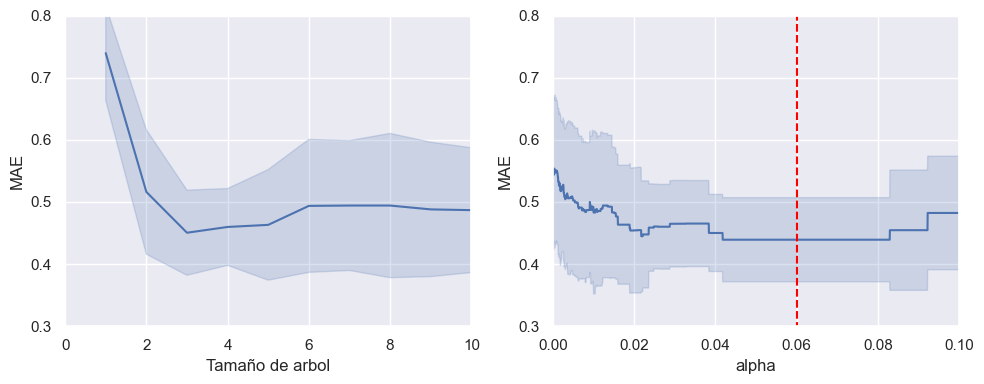

In [20]:
f, ax = plt.subplots(1,2, figsize=(10, 4))
sns.lineplot(data=df_results, x="on_leaf", y="value", errorbar="sd", ax=ax[0])
sns.lineplot(data=df_results, x="alpha", y="value", errorbar="sd", ax=ax[1])
ax[1].plot([0.06, 0.06], [-10, 10], color="red", linestyle="--")

ax[0].set_xlabel("Tamaño de arbol")
ax[0].set_ylabel("MAE")
ax[0].set_xlim([0, 10])
ax[1].set_xlim([0, 0.1])
ax[0].set_ylim([0.3, 0.8])
ax[1].set_ylim([0.3, 0.8])
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("MAE")
plt.tight_layout()

Elijamos el valor de alpha de 0.06: 

In [21]:
# Creamos el arbol
regression = DecisionTreeRegressor(criterion='squared_error', splitter='best', 
                                   max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                   random_state=42, ccp_alpha=0.06)
# Y entrenamos
regression.fit(X_train, y_train)

y_pred_train = regression.predict(X_train)
y_pred = regression.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred)

print(f"El error de entreamiento fue: {mae_train}")
print(f"El error de testeo fue: {mae}")


El error de entreamiento fue: 0.41363466446347563
El error de testeo fue: 0.499767325158296


El modelo no mejoro, pero es mucho mas general y tiene pocas ramas. Si lo vemos, nos damos cuenta que es el modelo que arrancamos la clase.

In [22]:
export_graphviz(regression, out_file = "arbol_regresion_alpha.dot",
                feature_names=["Hits", "PutOuts", "RBI", "Runs", "Walks", "Years"],
                rounded=True,
                filled=True)


---
## Arboles de clasificación

Para practicar el modelo de arbol de clasificación, vamos a usar el dataset [**Heart**](https://archive.ics.uci.edu/dataset/45/heart+disease), el cual mediciones de 1025 pacientes, con 13 atributos de variables fisiologicas. Además contamos con una columna de valores binarios llamada **target** que nos indica si el paciente tiene una enfermedad coronaria o no.

In [23]:
# Cargamos el dataset
df_heart = pd.read_csv("./Heart.csv")

In [24]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [25]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Las clases están bastante balanceadas, voy a usar F1-Score como metrica de evaluación

In [26]:
df_heart.target.value_counts()

1    526
0    499
Name: target, dtype: int64

---
Trabajemos en el modelo

Para este caso vamos a usar todos los atributos. Una ventaja del modelo de arbol es que no nos afecta el tipo de variable, podes usar variables categoricas sin problemas.

In [27]:
X = df_heart.iloc[:, :-1].values
y = df_heart.iloc[:, -1].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Ahora vamos a aplicar el modelo, primero llamamos al modelo de [arbol de clasificación](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el arbol
classification = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                        random_state=42)
# Y entrenamos
classification.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Podemos ver a nuestro arbol para entender que hizo usando export_graphviz

In [30]:
export_graphviz(classification, out_file = "arbol_clasificacion.dot",
                feature_names=df_heart.columns[:-1],
                class_names=["No tiene infarto", "Tiene infarto"],
                rounded=True,
                filled=True)

Midamos como este modelo performa usando el F1-score:

In [31]:
from sklearn.metrics import f1_score

y_pred_train = classification.predict(X_train)
y_pred = classification.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1 = f1_score(y_test, y_pred)

print(f"F1-score de entreamiento fue: {f1_train}")
print(f"F1-score de testeo fue: {f1}")

F1-score de entreamiento fue: 1.0
F1-score de testeo fue: 0.9898305084745762


El modelo predijo muy bien el set de testeo. Podemos ver otra forma de aplicar cross-validation pero en este caso jugando con la maxima profundidad que puede tener el modelo:

In [32]:
# Hagamos Cross-validation para varios valores de profundidad del arbol
scores_list = []
depth_array = np.arange(1, 30)
leaf_array = np.zeros_like(depth_array)
for index, depth in enumerate(depth_array):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    scores_list.append(np.abs(cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')))
    clf.fit(X_train, y_train)

scores_array = np.array(scores_list)
del scores_list

df_results = pd.DataFrame({"depth": depth_array,
                           "f11": scores_array[:, 0],
                           "f12": scores_array[:, 1],
                           "f13": scores_array[:, 2],
                           "f14": scores_array[:, 3],
                           "f15": scores_array[:, 4]})

df_results = pd.melt(df_results, id_vars=['depth'], value_vars=["f11", "f12", "f13", "f14", "f15"])

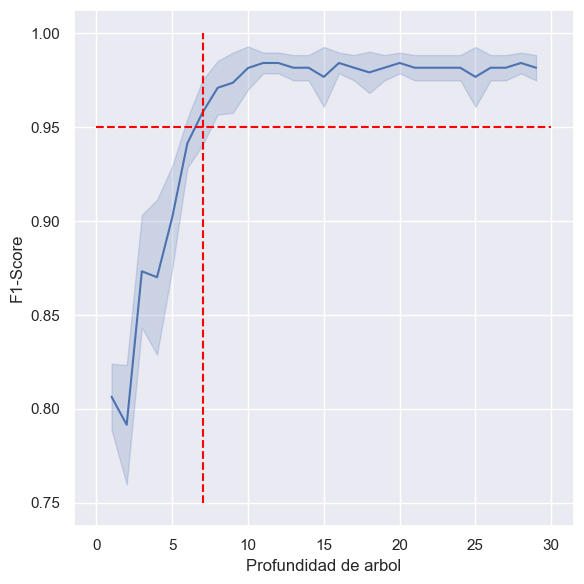

In [33]:
f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.lineplot(data=df_results, x="depth", y="value", errorbar="sd", ax=ax)
ax.plot([7, 7], [0.75, 1], color="red", linestyle="--")
ax.plot([0, 30], [0.95, 0.95], color="red", linestyle="--")

ax.set_xlabel("Profundidad de arbol")
ax.set_ylabel("F1-Score")
plt.tight_layout()

Vemos que en poca profundidad el arbol empieza a performar muy bien, pero de base con solo 1 profunidad ya nos da muy buenos resultados. Para este caso, supongamos que se puso como criterio a 0.95, entonces busquemos el arbol mas chico que tenga ese valor de f1-score que es de profundidad 7.

In [34]:
# Creamos el arbol
classification = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)
# Y entrenamos
classification.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

In [35]:
y_pred = classification.predict(X_test)

f1 = f1_score(y_test, y_pred)

print(f"F1-score de testeo fue: {f1}")

F1-score de testeo fue: 0.9438943894389439


In [36]:
export_graphviz(classification, out_file = "arbol_clasificacion_level7.dot",
                feature_names=df_heart.columns[:-1],
                class_names=["No tiene infarto", "Tiene infarto"],
                rounded=True,
                filled=True)

Veamos un modelo dos dimensional para ver como es la región de clasificación de un modelo

In [37]:
X = df_heart.loc[:, ["age", "trestbps"]].values
y = df_heart.iloc[:, -1].values

# Creamos el arbol
classification = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Y entrenamos
classification.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

/var/folders/50/q05bl7gj7jxb0qq6rb67fp4m0000gn/T/ipykernel_9942/3500360777.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


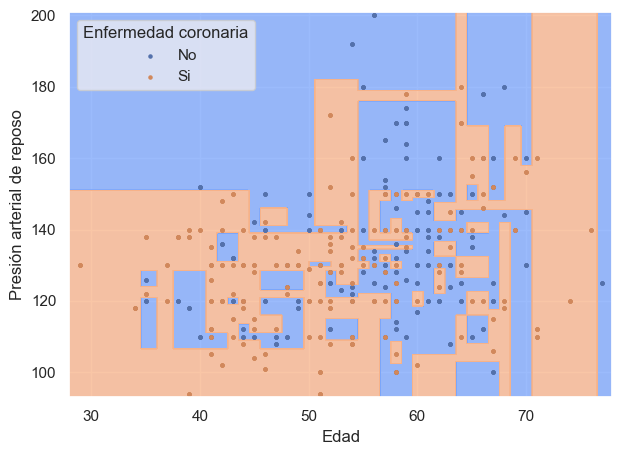

In [38]:
from matplotlib.colors import ListedColormap

# Crear la malla de puntos para el gráfico
X_set, y_set = X, y
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.1),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.1)
)

X_cont = np.array([X1.ravel(), X2.ravel()]).T

# Crear el gráfico de contorno
plt.figure(figsize=(7, 5))
plt.contourf(
    X1, X2, classification.predict(X_cont).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('#7aa5fb', '#f8b389'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de entrenamiento
lab = ["No", "Si"]
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('#5471ab', '#d1885c'))(i), label=lab[i],
        s=5
    )

plt.xlabel('Edad') 
plt.ylabel('Presión arterial de reposo') 
plt.legend(title="Enfermedad coronaria")

plt.show()

---
## Bosques aleatorios

Por ultimo vamos a utilizar un ejemplo de bosque aleatorio. Con estos bosques podemos usar casos de [clasificación](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier), como asi tambien de [regresión](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). Ahora vamos a hacer un ejemplo de regresión, pero el procedimiento de clasificación es similar.

In [39]:
# Cargamos el dataset
df_hitters = pd.read_csv("./Hitters.csv")

# Como los datos de salario no están completos, descartamos a aquellos jugadores que no tienen ese dato.
df_hitters.dropna(subset="Salary", inplace=True)

# Aplico feature engineering, modificando el target por el logaritmo
df_hitters["Salary_log"] = np.log(df_hitters["Salary"])

df_hitters.drop(columns="Salary", inplace=True)

In [40]:
X = df_hitters.iloc[:, :-1].values
# Y como variable a predecir a Salary_log
y = df_hitters.iloc[:, -1].values

# Para este ejemplo, solo voy a usar Years, RBI, PutOuts, Hits, Walks, Run como atributos. 
X = df_hitters.loc[:, ["Hits", "PutOuts", "RBI", "Runs", "Walks", "Years"]].values
# Y como variable a predecir a Salary_log
y = df_hitters.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Para este ejemplo, no vamos a tocar mucho los parametros, se usaran 100 arboles aleatorios usando bagging y seccionando a los atributos de entrada

In [41]:
# importamos RandomForestRegressor de los metodos de ensamble de sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

regression = RandomForestRegressor(random_state = 42)
regression.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
y_pred_train = regression.predict(X_train)
y_pred = regression.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred)

print(f"El error de entreamiento fue: {mae_train}")
print(f"El error de testeo fue: {mae}")

El error de entreamiento fue: 0.14242278057017446
El error de testeo fue: 0.34656304520733877


Aqui vemos como mejoramos el modelo al trabajar con un bosque en vez de un solo arbol.